In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Before run this script, run program that generate learn.txt and test_during_learn.txt files

In [2]:
df_l = pd.read_csv("n_learn_evaluting_NoiseInj.txt", sep=';')

In [3]:
df_l.head()

,MapNumber,EpochNumber,distortion,distortion_gss,quantization,quantization_gss
0,0,0,1.117605,0,0.059252,0
1,0,1,0.037498,0,0.095837,0
2,0,2,0.022171,0,0.071513,0
3,0,3,0.019824,0,0.057232,0
4,0,4,0.017105,0,0.052289,0


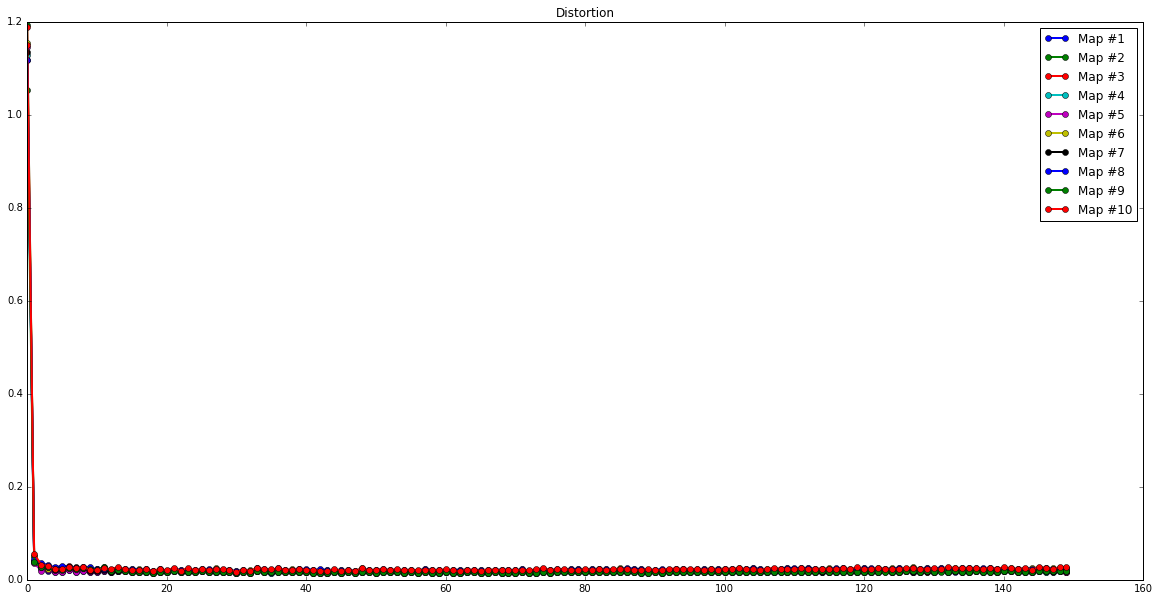

In [4]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_l.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Distortion')
    plt.plot(df_l[df_l['MapNumber']==i].reset_index(drop=True)['distortion'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

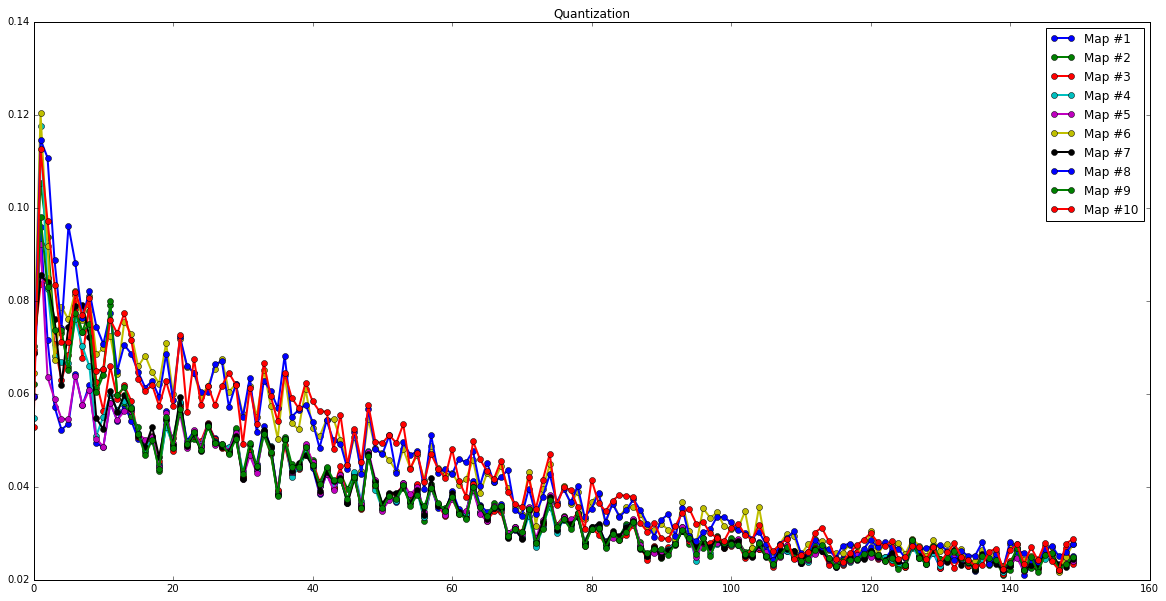

In [5]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_l.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Quantization')
    plt.plot(df_l[df_l['MapNumber']==i].reset_index(drop=True)['quantization'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

## Test during learning (valid)

In [6]:
df_v = pd.read_csv("n_valid_evaluting_NoiseInj.txt", sep=';')
df_v.head(10)

,MapNumber,EpochNumber,distortion,distortion_gss,quantization,quantization_gss
0,0,0,1.136438,0,0.061756,0
1,0,1,0.033329,0,0.090469,0
2,0,2,0.022999,0,0.072316,0
3,0,3,0.019507,0,0.057131,0
4,0,4,0.018398,0,0.048665,0
5,0,5,0.017739,0,0.052370,0
6,0,6,0.019635,0,0.057910,0
7,0,7,0.020197,0,0.066687,0
8,0,8,0.016347,0,0.045893,0
9,0,9,0.015761,0,0.046962,0


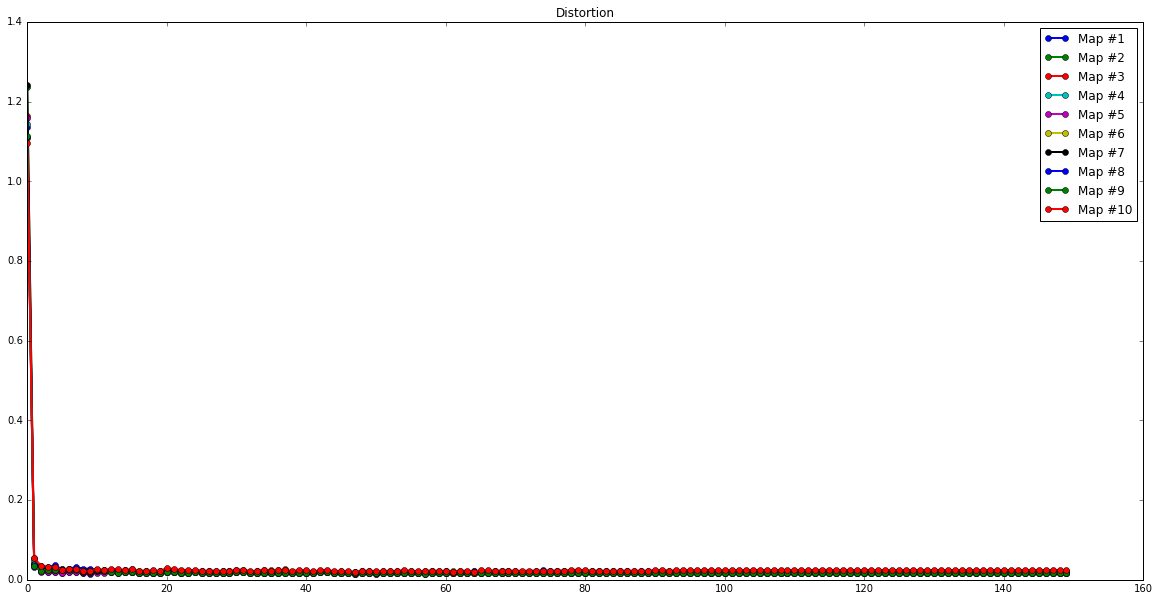

In [7]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_v.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Distortion')
#     plt.xlim([-1, 10])
    plt.plot(df_v[df_v['MapNumber']==i].reset_index(drop=True)['distortion'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

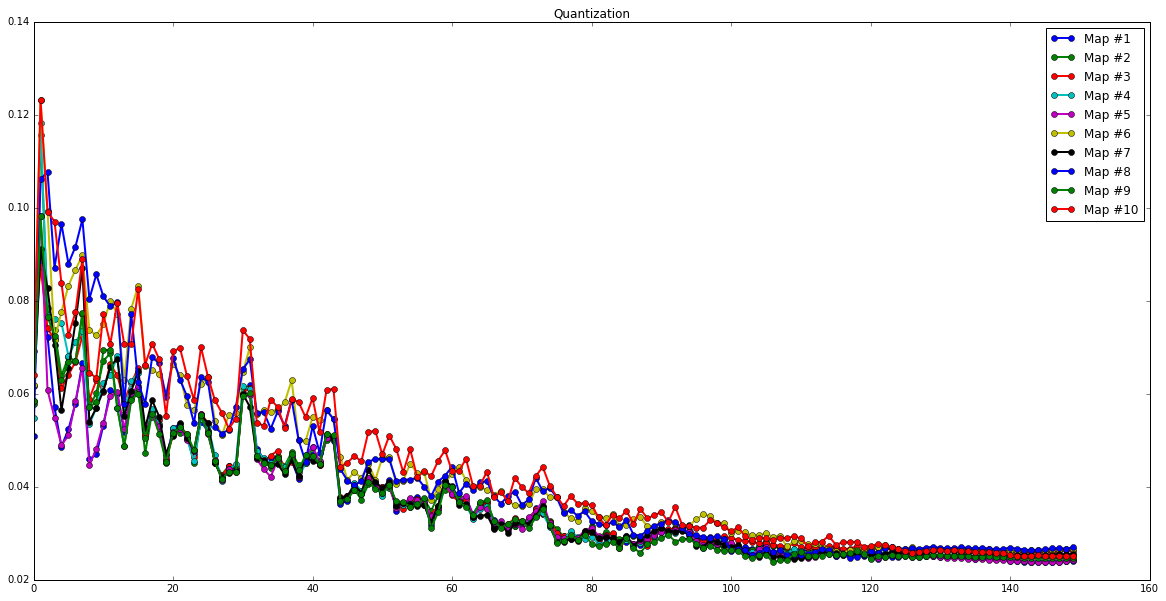

In [8]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_v.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Quantization')
    plt.plot(df_v[df_v['MapNumber']==i].reset_index(drop=True)['quantization'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

In [11]:
df_s = pd.read_csv("n_statistics_NoiseInj.txt", sep=';')
df_s.tail()

,Epoch,PercentageFaults,avg,avg_gss,avg_faulty,avg_gss_faulty,avgdist,avgdist_gss,avgdist_faulty,avgdist_gss_faulty,stddev,stddev_gss,stddev_faulty,stddev_gss_faulty,stddevdist,stddevdist_gss,stddevdist_faulty,stddevdist_gss_faulty
4525,150,25,0.024599,0,0.195099,0,0.019683,0,942.589502,0,0.000632,0,0.051084,0,0.003227,0,106.851051,0
4526,150,26,0.024599,0,0.212474,0,0.019683,0,981.500100,0,0.000632,0,0.059344,0,0.003227,0,112.755905,0
4527,150,27,0.024599,0,0.221898,0,0.019683,0,1045.691784,0,0.000632,0,0.068776,0,0.003227,0,121.214989,0
4528,150,28,0.024599,0,0.252119,0,0.019683,0,1093.599767,0,0.000632,0,0.093655,0,0.003227,0,136.024216,0
4529,150,29,0.024599,0,0.288344,0,0.019683,0,1142.618861,0,0.000632,0,0.129810,0,0.003227,0,149.416901,0


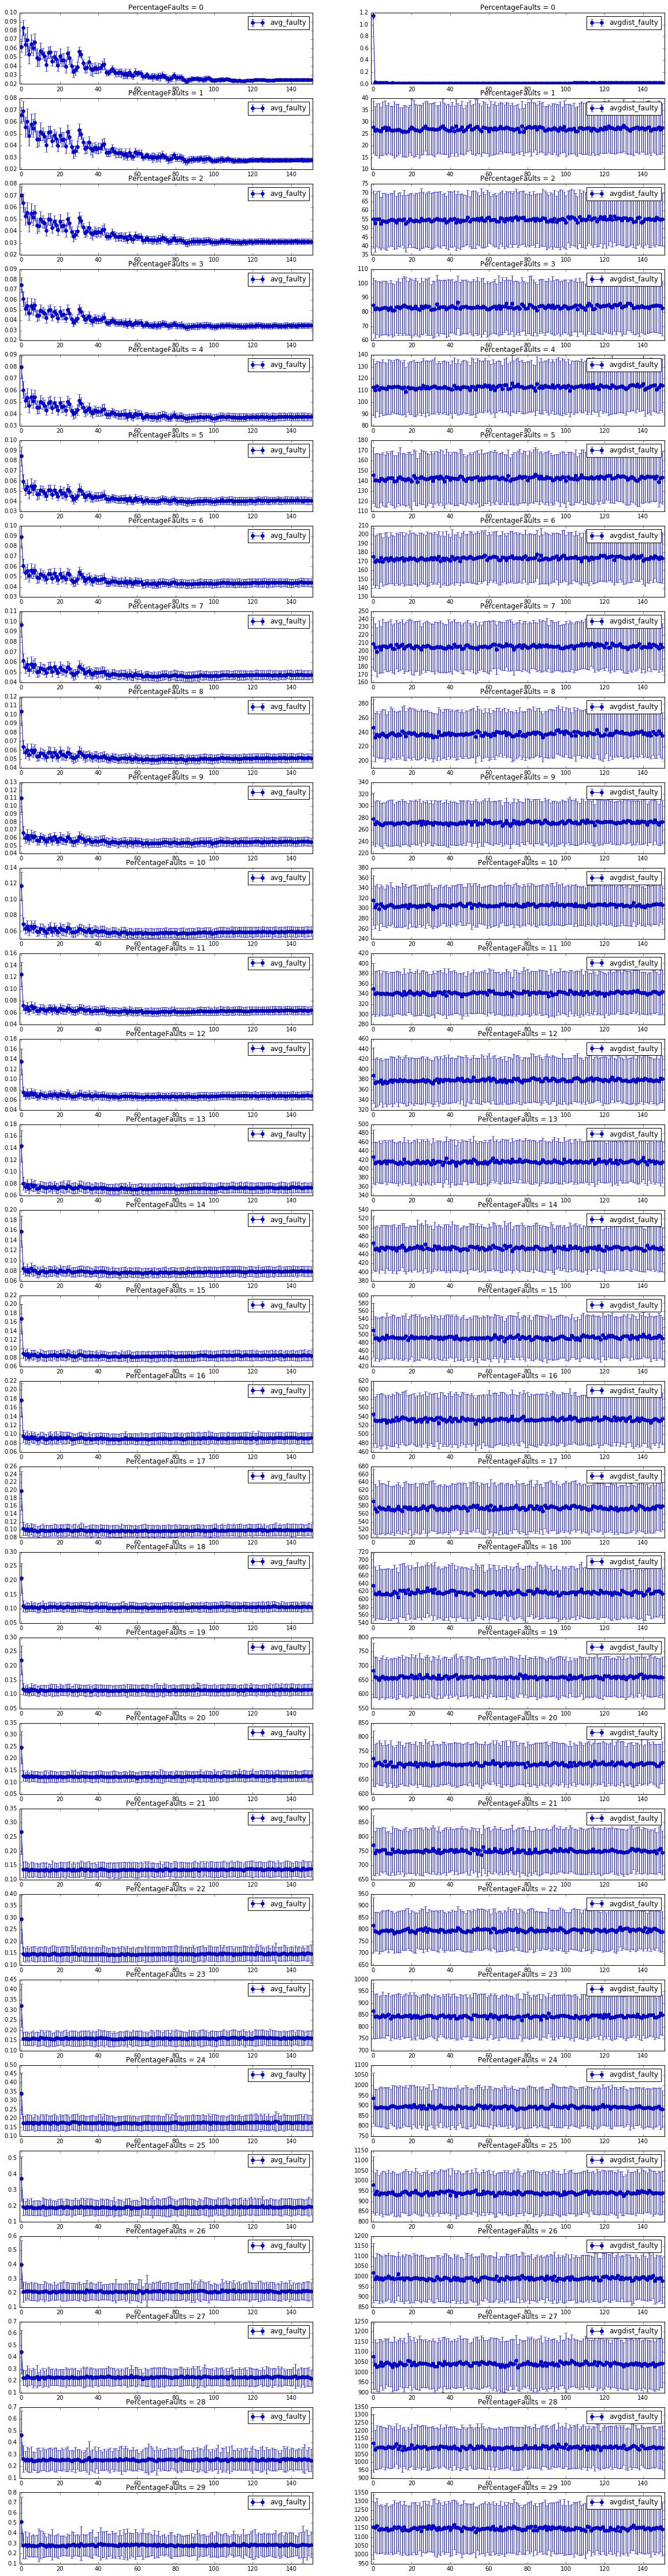

In [10]:
width = 20
height = 400
plt.figure(figsize=(width, height))
num = len(df_s['Epoch'].unique())
k = 1
for i in df_s['PercentageFaults'].unique():
    avg = df_s[df_s['PercentageFaults']==i].filter(regex=".*[^s]_faulty").filter(regex="avg.*").reset_index(drop=True)
    avg_iter = avg.__iter__()
    stddev = df_s[df_s['PercentageFaults']==i].filter(regex=".*[^s]_faulty").filter(regex="stddev.*").reset_index(drop=True)
    stddev_iter = stddev.__iter__()
    for j in range(0,2):
        plt.subplot(num,2,k)
        plt.xlim([-1, num])
        plt.title('PercentageFaults = ' + str(i))
        plt.errorbar(range(0,num), avg[avg_iter.__next__()], yerr=stddev[stddev_iter.__next__()], fmt='-o')
        plt.legend()
        k += 1